In [69]:
def create_dataset(data):
    data = data.dropna()
#     data['dt'] = pd.to_datetime(data['dt'])
    return data

def timeseries(data):
    time = data['date']
    series = data.iloc[:,-1]
    return series, time

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from math import sqrt

In [71]:
import pandas as pd

# Step 1: Load Data
df = pd.read_csv('sunspot_data.csv')

# Step 2: Calculate Yearly Averages of Sunspots
yearly_avg = df.groupby('Year')['Number of Sunspots'].mean().reset_index()

# Step 3: Format Output
yearly_avg['Year'] = yearly_avg['Year'].astype(int).astype(str)  # Convert year to string

# Step 4: Rename Columns and Prepare Final DataFrame
yearly_avg.columns = ['date', 'Number of Sunspots']

# Step 5: Optionally, Print or Save Results
print(yearly_avg.head())

# Save to CSV
yearly_avg.to_csv('yearly_avg_sunspots.csv', index=False)


   date  Number of Sunspots
0  1818           30.476712
1  1819           25.969863
2  1820           14.442623
3  1821            7.479452
4  1822            6.016438


In [72]:
# Load your univariate csv data file
# Assuming the file has a column named 'value'


import pandas as pd
import numpy as np

# Load data from CSV into a pandas DataFrame
df = pd.read_csv('/content/yearly_avg_sunspots.csv')

# Extract numeric columns for normalization
numeric_cols = ['Number of Sunspots']

# Convert 'Temp' column to numeric if needed (handle any non-numeric values gracefully)
df['Number of Sunspots'] = pd.to_numeric(df['Number of Sunspots'], errors='coerce')

# Define min-max normalization function
def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Normalize the numeric data
df['Number of Sunspots'] = min_max_normalize(df['Number of Sunspots'])

# Print normalized DataFrame
print(df)

# Optionally, save normalized data back to CSV
df.to_csv('sunspotnormavg.csv', index=False)


     date  Number of Sunspots
0    1818            0.107772
1    1819            0.090934
2    1820            0.047868
3    1821            0.021853
4    1822            0.016387
..    ...                 ...
197  2015            0.254747
198  2016            0.142688
199  2017            0.075130
200  2018            0.019960
201  2019            0.009444

[202 rows x 2 columns]


In [73]:

print(df.head())

   date  Number of Sunspots
0  1818            0.107772
1  1819            0.090934
2  1820            0.047868
3  1821            0.021853
4  1822            0.016387


In [74]:
df.corr()

,date,Number of Sunspots
date,1.000000,0.159802
Number of Sunspots,0.159802,1.000000


In [75]:
dff = create_dataset(df)
data, time = timeseries(dff)

In [76]:
data = np.asarray(data).reshape(-1,1)

Text(0, 0.5, 'Anomaly')

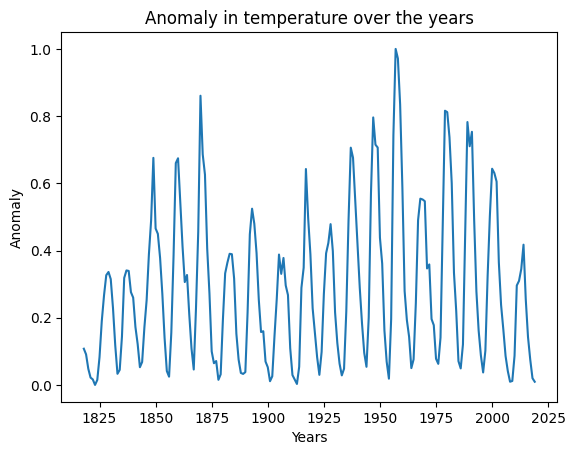

In [77]:
plt.plot(time,data)
plt.title('Anomaly in temperature over the years')
plt.xlabel('Years')
plt.ylabel('Anomaly')


In [78]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Define a function to find the best order for ARIMA
def find_best_arima_order(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None

    for p in p_range:
        for d in d_range:
            for q in q_range:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    continue

    return best_order, best_aic

# Define ranges for p, d, and q values to test
p_values = range(3)  # Change the range as needed
d_values = range(3)  # Change the range as needed
q_values = range(3)  # Change the range as needed

# Find the best order
best_order, best_aic = find_best_arima_order(data, p_values, d_values, q_values)

print(f"Best ARIMA Order: {best_order} with AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best ARIMA Order: (2, 1, 2) with AIC: -399.85752077108964


Root Mean Squared Error (RMSE): 0.0867618535623479
Mean Absolute Percentage Error (MAPE): inf%

ARIMA Model Values from Index 0 to Index 50:
[0.05644134 0.14189546 0.23650201 0.30938663 0.33811391 0.31551131
 0.25126107 0.16799356 0.09339708 0.05107032 0.05312002 0.09680427
 0.16611156 0.23753609 0.2879937  0.30223071 0.27736519 0.22323385
 0.15862973 0.10483421 0.07865181 0.08721245 0.12613097 0.18145868
 0.23462081 0.26861113 0.27339098 0.24879285 0.20411109 0.15466694
 0.11659528 0.10161413 0.11346101 0.14706464 0.19059027 0.22956554
 0.25166151 0.25055962 0.22770301 0.19146787 0.15414266 0.12778997
 0.12037538 0.13339629 0.16170358 0.19547051 0.2235745  0.23723727
 0.2327397  0.2123813  0.18345775]


<ipython-input-79-d48b2ac48110>:13: RuntimeWarning: divide by zero encountered in divide
  mape = np.abs(np.mean(np.abs(data-np.array(predictions).reshape(-1,1))/ data)*100)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


0.0867618535623479

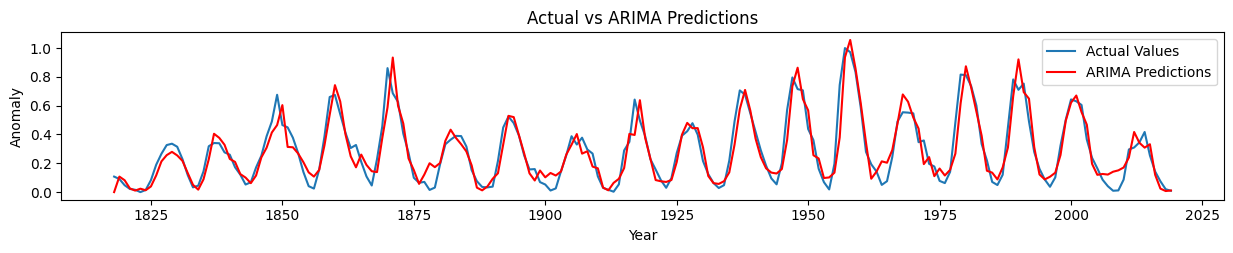

In [79]:
# Fit the ARIMA model
order = best_order  # You may need to adjust these parameters based on your data
model = ARIMA(data, order=order)
model_fit = model.fit()

# Predict values for the entire dataset
predictions = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# # Calculate RMSE and MAPE
rmse = sqrt(mean_squared_error(data, predictions))

# # Check for division by zero in MAPE calculation
mape = np.abs(np.mean(np.abs(data-np.array(predictions).reshape(-1,1))/ data)*100)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the actual vs predicted values
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(time,data, label='Actual Values')
plt.plot(time,predictions, label='ARIMA Predictions', color='red')
plt.title('Actual vs ARIMA Predictions')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.legend()

# Plot the trend, seasonal, and residual components
# decomposition = seasonal_decompose(model_fit.fittedvalues, model='additive', period=10)  # Adjust the period as needed
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(4, 1, 2)
# plt.plot(trend, label='Trend')
# plt.title('Trend Component')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()

# plt.subplot(4, 1, 3)
# plt.plot(seasonal, label='Seasonal')
# plt.title('Seasonal Component')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()

# plt.subplot(4, 1, 4)
# plt.plot(residual, label='Residual')
# plt.title('Residual Component')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Print model values from index 0 to index 50
forecast_steps = 51
forecast_values = model_fit.forecast(steps=forecast_steps, typ='levels')
print(f"\nARIMA Model Values from Index 0 to Index {forecast_steps-1}:\n{forecast_values}")



In [80]:
for i in range(174):
    print(time[i],predictions[i])

1818 0.0
1819 0.10777198986844316
1820 0.08245322184472312
1821 0.02562987510122159
1822 0.010688798886450905
1823 0.023744336595651477
1824 0.012912754616684907
1825 0.039405840381961224
1826 0.11590585065550885
1827 0.21330216980827468
1828 0.25661542094389994
1829 0.27950831712207713
1830 0.2547409799106544
1831 0.2169531385956702
1832 0.1325585845509723
1833 0.050594041382213004
1834 0.017007643056085167
1835 0.08899609057085323
1836 0.2277848811713742
1837 0.4050221361475751
1838 0.3766573063549857
1839 0.3285712995333582
1840 0.23037195772819036
1841 0.2097510003047815
1842 0.12522311894714327
1843 0.10078019296599296
1844 0.06211686345472983
1845 0.11536983884092138
1846 0.24067345694794878
1847 0.30805222705428786
1848 0.41390152903711885
1849 0.46539532661699157
1850 0.6040671663222242
1851 0.31377011001096683
1852 0.31124134502628753
1853 0.26795553811217765
1854 0.2077846742812694
1855 0.13711351277760248
1856 0.10782591140804944
1857 0.153770952035805
1858 0.323452592732642

(41,)
(41, 1)
Root Mean Squared Error (RMSE) for Testing Set: 0.19122458552530627
Mean Absolute Percentage Error (MAPE) for Testing Set: 300.9063889368252%


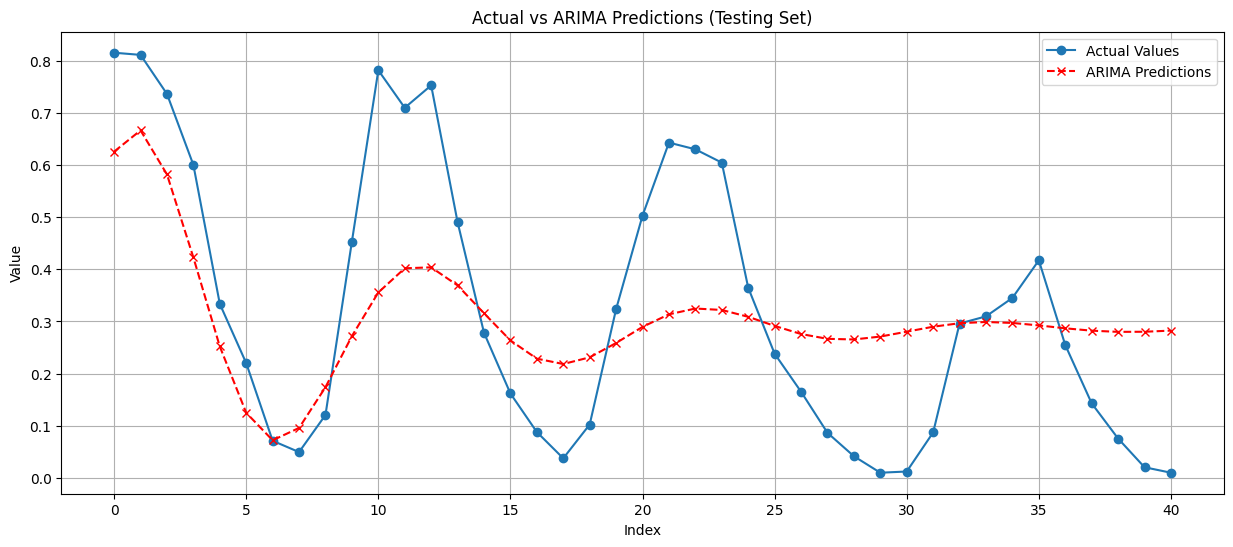


Last 3 ARIMA Model Values for the Testing Set:
[0.62612356 0.66692016 0.58243098 0.42283622 0.25186749 0.1245181
 0.07173714 0.09549242 0.17373384 0.27182101 0.35564289 0.40205181
 0.40390555 0.36919656 0.31567394 0.26348576 0.22849476 0.2182027
 0.23104048 0.2585966  0.28953047 0.31363828 0.32478609 0.32202204
 0.30887418 0.2913996  0.27582738 0.26660159 0.26535179 0.27093075
 0.28030258 0.28984351 0.29657413 0.29895581 0.29708894 0.29236684
 0.28679689 0.28226247 0.27996504 0.28018419 0.28236846 0.28546542
 0.28834309 0.29015478 0.29054585 0.2896686  0.28803779 0.286302
 0.28501752 0.28449435 0.28474772 0.2855501  0.28654811 0.28739591
 0.2878605  0.28787205 0.28751409 0.28696821 0.28643914 0.28608706
 0.2859867  0.28612066 0.28640252 0.2867168  0.28696019 0.28707114
 0.28704085 0.28690582 0.28672789 0.28657026 0.28647773 0.28646635
 0.28652404 0.28661971 0.2867165  0.2867843  0.28680775 0.28678813
 0.28673977 0.28668314 0.28663732 0.28661439 0.28661702 0.28663949
 0.28667105 0.2867

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [81]:
#ye 29 vala arima hai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your univariate csv data file
# Split the data into training and testing sets

split_time = int(0.8 *  len(data))
time_train = time[:split_time]
train_data = data[:split_time]
time_valid = time[split_time:]
test_data = data[split_time:]
if len(test_data) == 0:
    raise ValueError("Test data is empty or has zero samples.")

# Fit the ARIMA model
order = (2,0,2)  # You may need to adjust these parameters based on your data
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Predict values for the testing set
predictions = model_fit.predict(start=len(train_data), end=len(data) - 1, typ='levels')

# Calculate RMSE and MAPE for the testing set

rmse = sqrt(mean_squared_error(test_data, predictions))
print(predictions.shape)
print(test_data.shape)
# Check for division by zero in MAPE calculation
mape = np.mean(np.abs(test_data - predictions.reshape(-1,1)) / test_data) * 100

print(f"Root Mean Squared Error (RMSE) for Testing Set: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for Testing Set: {mape}%")

# Plot the actual vs predicted values for the testing set
plt.figure(figsize=(15, 6))

plt.plot(test_data, label='Actual Values', marker='o')
plt.plot(predictions, label='ARIMA Predictions', linestyle='--', marker='x', color='red')
plt.title('Actual vs ARIMA Predictions (Testing Set)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Print model values from index 29 to 31 (last 3 values for testing set)
last_3_model_values = model_fit.forecast(steps=680, typ='levels')[-680:]
print("\nLast 3 ARIMA Model Values for the Testing Set:")
print(last_3_model_values)


<ipython-input-82-352248264f91>:21: RuntimeWarning: divide by zero encountered in divide
  mape = np.abs(np.mean(np.abs(data - np.array(predictions).reshape(-1,1)) / data) * 100)


Root Mean Squared Error (RMSE): 0.1328475691159577
Mean Absolute Percentage Error (MAPE): inf%

HWELTS Model Values from Index 0 to Index 50:
[ 0.00260058 -0.01025355 -0.02317874 -0.02833547 -0.0411896  -0.05411479
 -0.05927151 -0.07212565 -0.08505084 -0.09020756 -0.1030617  -0.11598689
 -0.12114361 -0.13399775 -0.14692294 -0.15207966 -0.1649338  -0.17785899
 -0.18301571 -0.19586984 -0.20879504 -0.21395176 -0.22680589 -0.23973108
 -0.24488781 -0.25774194 -0.27066713 -0.27582386 -0.28867799 -0.30160318
 -0.30675991 -0.31961404 -0.33253923 -0.33769595 -0.35055009 -0.36347528
 -0.368632   -0.38148614 -0.39441133 -0.39956805 -0.41242219 -0.42534738
 -0.4305041  -0.44335824 -0.45628343 -0.46144015 -0.47429428 -0.48721948
 -0.4923762  -0.50523033 -0.51815552]


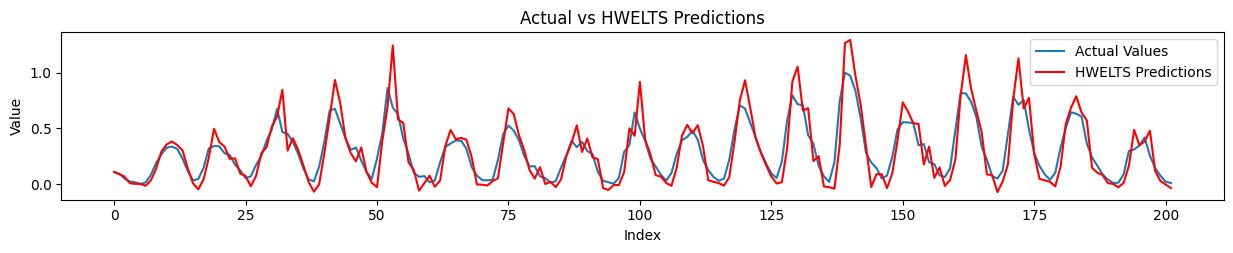

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your univariate csv data file
# Assuming the file has a column named 'value'
# Fit the Holt-Winters Exponential Smoothing model
trend = 'add'  # or 'additive'
seasonal = 'add'  # or 'additive'
model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=3)
model_fit = model.fit()

# Predict values for the entire dataset
predictions = model_fit.predict(start=0, end=len(data) - 1)

# Calculate RMSE and MAPE
rmse = sqrt(mean_squared_error(data, predictions))
mape = np.abs(np.mean(np.abs(data - np.array(predictions).reshape(-1,1)) / data) * 100)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the actual vs predicted values
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(data, label='Actual Values')
plt.plot(predictions, label='HWELTS Predictions', color='red')
plt.title('Actual vs HWELTS Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()


# Print model values from index 0 to index 50
forecast_steps = 51
forecast_values = model_fit.forecast(steps=forecast_steps)
print(f"\nHWELTS Model Values from Index 0 to Index {forecast_steps-1}:\n{forecast_values}")


In [64]:
predictions.shape

(202,)

Root Mean Squared Error (RMSE) for Testing Set: 0.24282058835321144
Mean Absolute Percentage Error (MAPE) for Testing Set: 288.5442072669152%


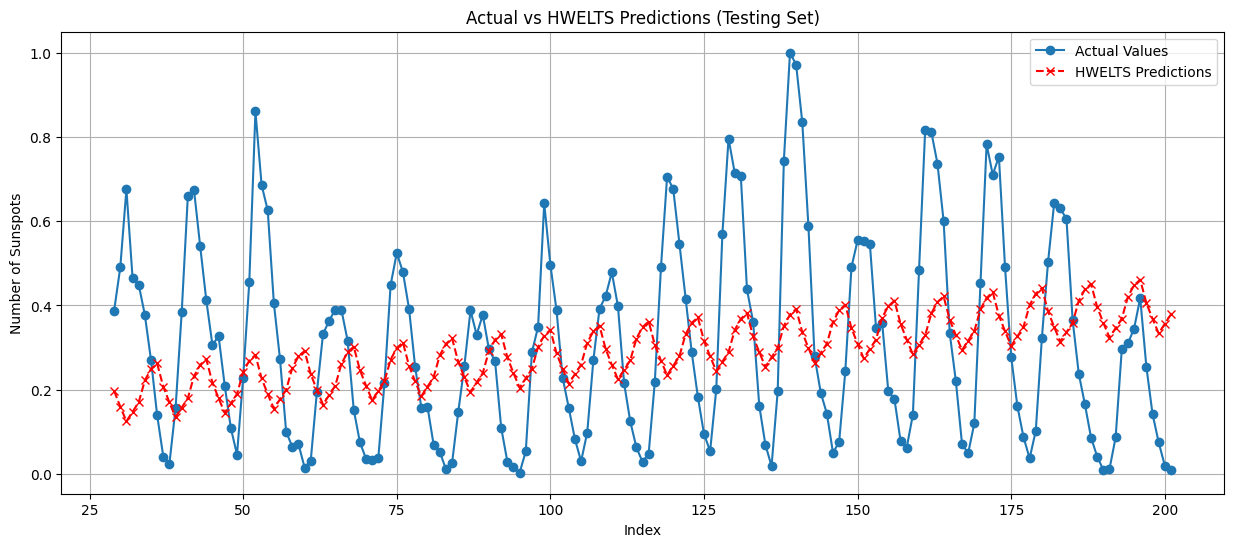


Last 3 HWELTS Model Values for the Testing Set:
29    0.197188
30    0.159814
31    0.125045
dtype: float64


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your univariate csv data file
data = pd.read_csv('/content/sunspotnormavg.csv')

# Split the data into training and testing sets
train_data = data.iloc[:29]['Number of Sunspots']
test_data = data.iloc[29:]['Number of Sunspots']

# Fit the Holt-Winters Exponential Smoothing model
trend = 'add'  # or 'additive'
seasonal = 'add'  # or 'additive'
model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=8)
model_fit = model.fit()

# Predict values for the testing set
predictions = model_fit.predict(start=len(train_data), end=len(data) - 1)

# Calculate RMSE and MAPE for the testing set
rmse = sqrt(mean_squared_error(test_data, predictions))
mape = np.mean(np.abs(test_data - predictions) / test_data) * 100

print(f"Root Mean Squared Error (RMSE) for Testing Set: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for Testing Set: {mape}%")

# Plot the actual vs predicted values for the testing set
plt.figure(figsize=(15, 6))

plt.plot(test_data, label='Actual Values', marker='o')
plt.plot(predictions, label='HWELTS Predictions', linestyle='--', marker='x', color='red')
plt.title('Actual vs HWELTS Predictions (Testing Set)')
plt.xlabel('Index')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.grid()
plt.show()

# Return the last 3 model values for the testing set
last_3_model_values = model_fit.forecast(steps=3)
print("\nLast 3 HWELTS Model Values for the Testing Set:")
print(last_3_model_values)


Root Mean Squared Error (RMSE): 0.132971042819955
Mean Absolute Percentage Error (MAPE): inf%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


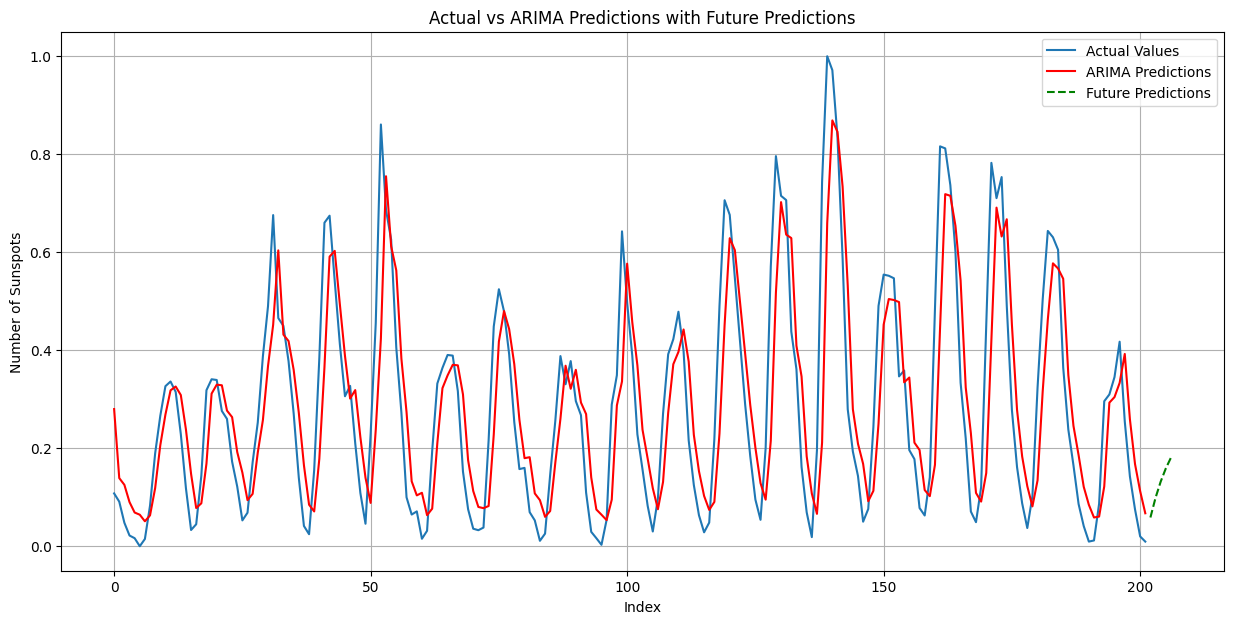

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your univariate csv data file
data = pd.read_csv('/content/sunspotnormavg.csv')

# Select the target variable (assuming 'Number of Sunspots' is the column you want to model)
target_variable = 'Number of Sunspots'

# Fit the ARIMA model
order = (1, 0, 0)  # You may need to adjust these parameters based on your data
model = ARIMA(data[target_variable], order=order)
model_fit = model.fit()

# Predict values for the entire dataset
predictions = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# Calculate RMSE and MAPE
rmse = sqrt(mean_squared_error(data[target_variable], predictions))
mape = np.mean(np.abs(data[target_variable] - np.array(predictions)) / data[target_variable]) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the actual vs predicted values
plt.figure(figsize=(15, 7))

# Plot actual values
plt.plot(data[target_variable], label='Actual Values')

# Plot ARIMA predictions
plt.plot(predictions, label='ARIMA Predictions', color='red')

# Plot future predictions
forecast_steps = 5
forecast_values = model_fit.forecast(steps=forecast_steps, typ='levels')
future_indices = range(len(data), len(data) + forecast_steps)
plt.plot(future_indices, forecast_values, label='Future Predictions', color='green', linestyle='dashed')

plt.title('Actual vs ARIMA Predictions with Future Predictions')
plt.xlabel('Index')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.grid()
plt.show()


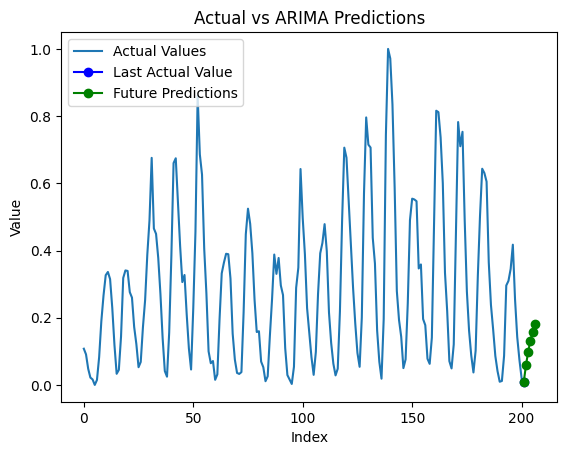

In [93]:
# Plot the actual values
plt.plot(data.index, data['Number of Sunspots'], label='Actual Values')

# Plot marker for the last actual value
plt.plot(data.index[-1], data['Number of Sunspots'].iloc[-1], marker='o', color='blue', label='Last Actual Value')

# Plot future predictions
future_indices = range(len(data), len(data) + 5)
future_values = model_fit.forecast(steps=5, typ='levels')
plt.plot(list(data.index)[-1:] + list(future_indices), list(data['Number of Sunspots'].iloc[-1:]) + list(future_values), marker='o', linestyle='-', label='Future Predictions', color='green')

# Set plot labels and legend
plt.title('Actual vs ARIMA Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()
